<a href="https://colab.research.google.com/github/alejomagri/SANDBOX/blob/main/car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD EAN**


ESPECIALIZACION EN MACHINE LEARNING

**Guia 2 – car_evaluation”**


* Por: Sebastian Alejandro Magri Gordillo

ACTIVIDAD 1
Utilizar una base dispuesta en el siguiente enlace: [car_evaluation](https://archive.ics.uci.edu/dataset/19/car+evaluation). para que a partir de ciertas características de los automóviles se permita establecer una evaluación de calidad del auto.

**carga de dependencias**

In [225]:
!pip install --upgrade category_encoders

In [226]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sb
import category_encoders as ce

%matplotlib inline

**carga de data**

In [227]:

csv_file = r'/content/sample_data/car_evaluation.csv'

df = pd.read_csv(csv_file)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**Pre-procesamiento**

In [228]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [230]:
df.groupby('class').size()

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

In [231]:
class_a_numerico = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood':3}
df['class_numerica'] = df['class'].map(class_a_numerico)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   buying          1728 non-null   object
 1   maint           1728 non-null   object
 2   doors           1728 non-null   object
 3   persons         1728 non-null   object
 4   lug_boot        1728 non-null   object
 5   safety          1728 non-null   object
 6   class           1728 non-null   object
 7   class_numerica  1728 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [232]:
df.groupby('class_numerica').size()

class_numerica
0    1210
1     384
2      69
3      65
dtype: int64

In [233]:
def show(df):
  for i in df.columns[1:]:
    print("caracteristica: {} valores {}".format(i,df[i].unique()))
show(df)

caracteristica: maint valores ['vhigh' 'high' 'med' 'low']
caracteristica: doors valores ['2' '3' '4' '5more']
caracteristica: persons valores ['2' '4' 'more']
caracteristica: lug_boot valores ['small' 'med' 'big']
caracteristica: safety valores ['low' 'med' 'high']
caracteristica: class valores ['unacc' 'acc' 'vgood' 'good']
caracteristica: class_numerica valores [0 1 3 2]


In [234]:
df.isnull().sum()

buying            0
maint             0
doors             0
persons           0
lug_boot          0
safety            0
class             0
class_numerica    0
dtype: int64

- Se define la variable destino y la de las caracteristicas:

In [235]:
def plot(column):
    x=df[column].unique()
    y=df[column].value_counts()
    plt.bar(x,y)
    plt.ylabel('distribuido en  ' + column)
    return plt.show()

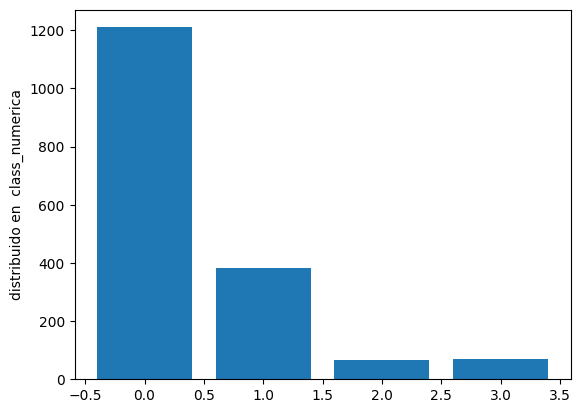

In [236]:
plot('class_numerica')

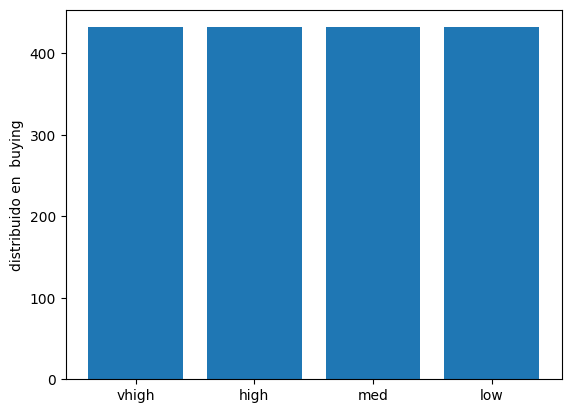

In [237]:
plot('buying')

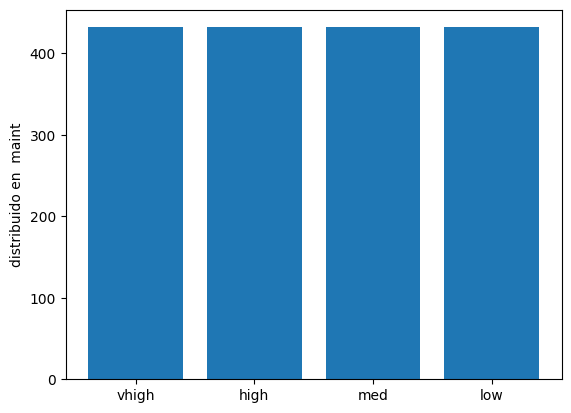

In [238]:
plot('maint')

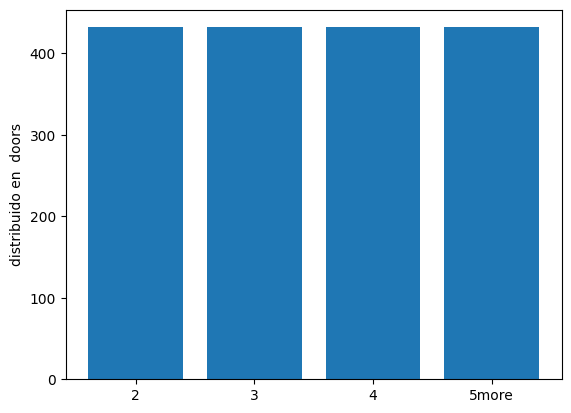

In [239]:
plot('doors')

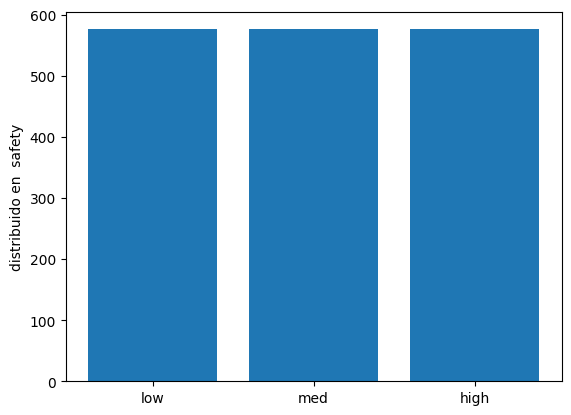

In [240]:
plot('safety')

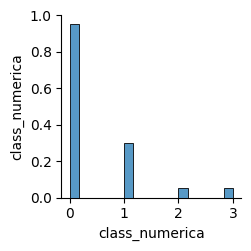

In [241]:
sb.pairplot(df)

In [242]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
df = encoder.fit_transform(df)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class,class_numerica
0,1,1,1,1,1,1,1,0
1,1,1,1,1,1,2,1,0
2,1,1,1,1,1,3,1,0
3,1,1,1,1,2,1,1,0
4,1,1,1,1,2,2,1,0


- Terminada la parte de EDA, se procede a dividir los datos que serán de 'TRAIN' y los que serán de 'TEST'

In [243]:
x = df.drop(['class'], axis =1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
print("x_train: {}".format(x_train.shape))
print("x_test:  {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test:  {}".format(y_test.shape))


x_train: (1209, 7)
x_test:  (519, 7)
y_train: (1209,)
y_test:  (519,)


- Se definen los parametros de evaluacion

In [244]:
def parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test):
  print("..................................................................................")
  print("Reporte de la data ENTRENADA clasificada")
  print(classification_report(y_train, y_predic_train))
  print("Reporte de la data EVALUADA clasificada")
  print(classification_report(y_test, y_predic_test))
  print("..................................................................................")

  # Accuracy
  print("El Accuracy en la data ENTRENADA es:   {}".format(round(accuracy_score(y_train,y_predic_train),2)))
  print("El Accuracy en la data EVALUADA es:    {}".format(round(accuracy_score(y_test,y_predic_test),2)))
  print("..................................................................................")

  # Precision
  print("El precision en la data ENTRENADA es:  {}".format(round(precision_score(y_train,y_predic_train,average = "weighted"),2)))
  print("El precision en la data EVALUADA es:   {}".format(round(precision_score(y_test,y_predic_test,average = "weighted"),2)))
  print("..................................................................................")

  # Recall
  print("El Recall en la data ENTRENADA es:   {}".format(round(recall_score(y_train,y_predic_train,average = "weighted"),2)))
  print("El Recall en la data EVALUADA es:    {}".format(round(recall_score(y_test,y_predic_test,average = "weighted"),2)))
  print("..................................................................................")

  # F1 Score
  print("El F1 Score en la data ENTRENADA es: {}".format(round(f1_score(y_train,y_predic_train,average = "weighted"),2)))
  print("El F1 Score en la data EVALUADA es:  {}".format(round(f1_score(y_test,y_predic_test,average = "weighted"),2)))
  print("..................................................................................")

** *REGRESION LOGISTICA* **

In [245]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(x_train,y_train)

y_predic_train = lr.predict(x_train)
y_predic_test = lr.predict(x_test)


parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test)



..................................................................................
Reporte de la data ENTRENADA clasificada
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       840
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        54

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Reporte de la data EVALUADA clasificada
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       370
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        15

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.

** *RANDOM FOREST* **

In [246]:
random_f = RandomForestClassifier(max_depth = 7,random_state = 48)
random_f.fit(x_train,y_train)

y_predic_train = random_f.predict(x_train)
y_predic_test = random_f.predict(x_test)


parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test)

..................................................................................
Reporte de la data ENTRENADA clasificada
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       840
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        54

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Reporte de la data EVALUADA clasificada
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       370
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        15

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.

** *ARBOL DE DECISIÓN* **

In [247]:
arbol_d = DecisionTreeClassifier(max_depth = 7,random_state = 48)
arbol_d.fit(x_train,y_train)

y_predic_train = arbol_d.predict(x_train)
y_predic_test = arbol_d.predict(x_test)


parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test)

..................................................................................
Reporte de la data ENTRENADA clasificada
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       840
           2       1.00      1.00      1.00       269
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        54

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Reporte de la data EVALUADA clasificada
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       370
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        15

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.

Conclusion final


- Se implementaron 3 modelos para evaluar la mejor prediccion. (Regresion logistica, Random forest y arbol de decision)
- Se emplearon parametros de evaluacion (Accuracy, Precision, F1-Score y Recall).
- Cada modelo demostro un desempeño altisimo